In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import defaultdict

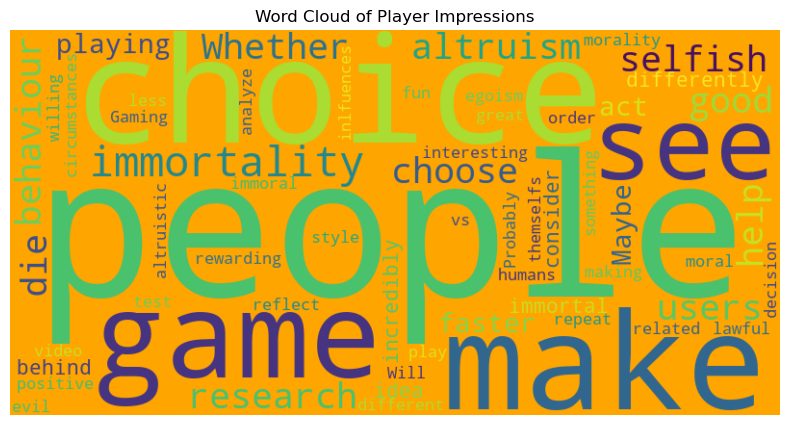

In [77]:
general_df = pd.read_csv('general_questions.csv')
text = ' '.join([str(text) for text in general_df['impression'] if pd.notna(text)])
wordcloud = WordCloud(width=800, height=400, background_color='orange').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Player Impressions')
plt.show()

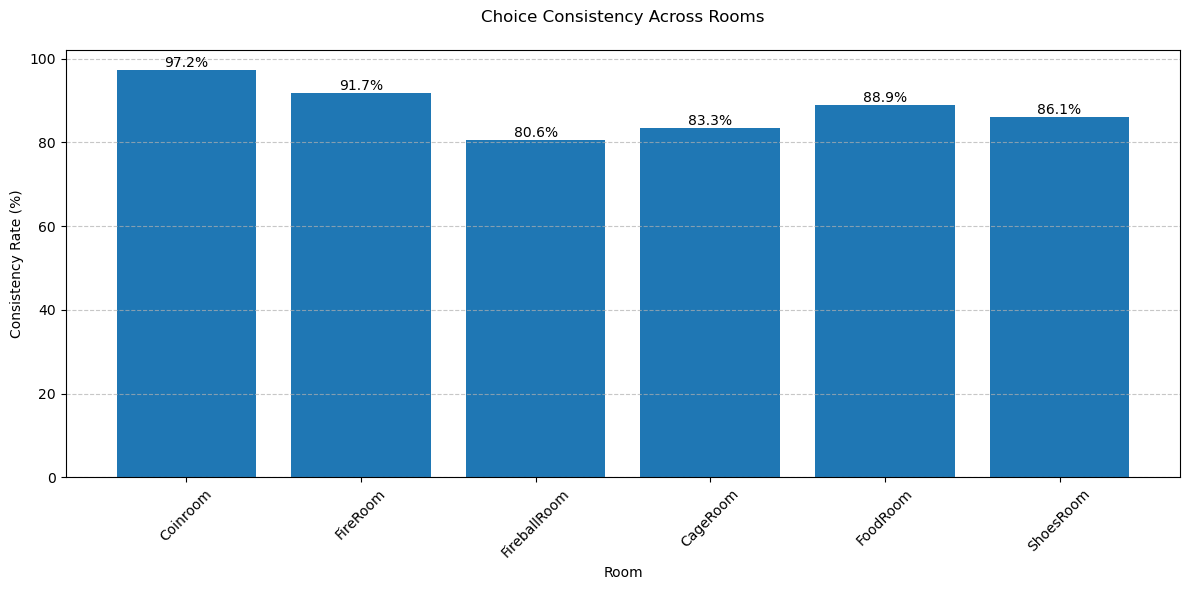


Detailed Consistency Statistics:
        room  total_responses  consistent_responses  consistency_rate
    Coinroom               36                    35         97.222222
    FireRoom               36                    33         91.666667
FireballRoom               36                    29         80.555556
    CageRoom               36                    30         83.333333
    FoodRoom               36                    32         88.888889
   ShoesRoom               36                    31         86.111111


In [71]:
df = pd.read_csv('merged_resorted_data.csv')

choice_mapping = {
    'Coinroom': {
        'Yes': ['Donated money'],
        'No': ['Kept the money']
    },
    'FireRoom': {
        'Help them': ['Helped the villager'],
        "Don't help them": ['Let them die']
    },
    'FireballRoom': {
        'Good luck': ['Let her live'],
        'Kill her to take over her power': ['Killed her']
    },
    'CageRoom': {
        'Free the human': ['Freed the human'],
        'Get the sword': ['Got the sword']
    },
    'FoodRoom': {
        'Give food': ['Gave them the cookie'],
        'Eat it yourself': ['Ate the cookie yourself']
    },
    'ShoesRoom': {
        'Complement shoes': ['Complemented his shoes'],
        'Steal the shoes': ['Stole his shoes']
    }
}

consistency_data = {
    'room': [],
    'total_responses': [],
    'consistent_responses': [],
    'consistency_rate': []
}

for room in choice_mapping.keys():
    room_data = df[df['room'] == room]
    total = len(room_data)

    consistent = 0
    for _, row in room_data.iterrows():
        if pd.notna(row['choice']) and pd.notna(row['in_game_choice']):
            for choice, reported_choices in choice_mapping[room].items():
                if row['choice'] == choice and row['in_game_choice'] in reported_choices:
                    consistent += 1
    
    consistency_data['room'].append(room)
    consistency_data['total_responses'].append(total)
    consistency_data['consistent_responses'].append(consistent)
    consistency_data['consistency_rate'].append(
        (consistent/total * 100) if total > 0 else 0
    )

consistency_df = pd.DataFrame(consistency_data)

plt.figure(figsize=(12, 6))

bars = plt.bar(consistency_df['room'], consistency_df['consistency_rate'])

plt.title('Choice Consistency Across Rooms', pad=20)
plt.xlabel('Room')
plt.ylabel('Consistency Rate (%)')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

print("\nDetailed Consistency Statistics:")
print(consistency_df.to_string(index=False))


In [16]:
consistency_df

,room,total_responses,consistent_responses,consistency_rate
0,Coinroom,36,35,97.222222
1,FireRoom,36,33,91.666667
2,FireballRoom,36,29,80.555556
3,CageRoom,36,30,83.333333
4,FoodRoom,36,32,88.888889
5,ShoesRoom,36,31,86.111111


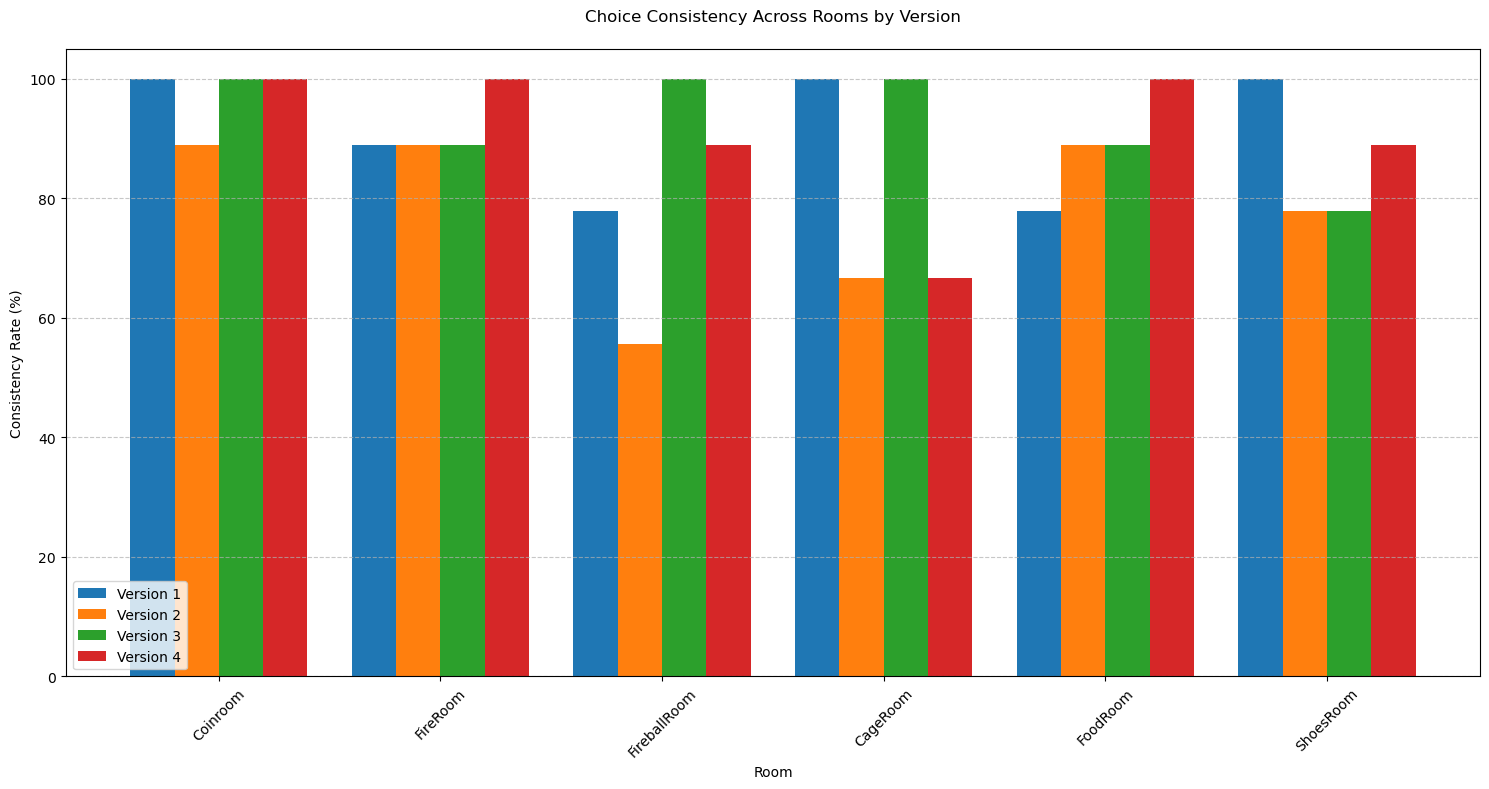


Detailed Consistency Statistics by Version:
version           1     2      3      4
room                                   
CageRoom      100.0  66.7  100.0   66.7
Coinroom      100.0  88.9  100.0  100.0
FireRoom       88.9  88.9   88.9  100.0
FireballRoom   77.8  55.6  100.0   88.9
FoodRoom       77.8  88.9   88.9  100.0
ShoesRoom     100.0  77.8   77.8   88.9


In [74]:
df = pd.read_csv('merged_resorted_data.csv')

df['version'] = df['level'].astype(str).str[0]

choice_mapping = {
    'Coinroom': {
        'Yes': ['Donated money'],
        'No': ['Kept the money']
    },
    'FireRoom': {
        'Help them': ['Helped the villager'],
        "Don't help them": ['Let them die']
    },
    'FireballRoom': {
        'Good luck': ['Let her live'],
        'Kill her to take over her power': ['Killed her']
    },
    'CageRoom': {
        'Free the human': ['Freed the human'],
        'Get the sword': ['Got the sword']
    },
    'FoodRoom': {
        'Give food': ['Gave them the cookie'],
        'Eat it yourself': ['Ate the cookie yourself']
    },
    'ShoesRoom': {
        'Complement shoes': ['Complemented his shoes'],
        'Steal the shoes': ['Stole his shoes']
    }
}

consistency_data = {
    'version': [],
    'room': [],
    'total_responses': [],
    'consistent_responses': [],
    'consistency_rate': []
}

for version in sorted(df['version'].unique()):
    version_df = df[df['version'] == version]
    
    for room in choice_mapping.keys():
        room_data = version_df[version_df['room'] == room]
        total = len(room_data)
        
        consistent = 0
        for _, row in room_data.iterrows():
            if pd.notna(row['choice']) and pd.notna(row['in_game_choice']):
                for choice, reported_choices in choice_mapping[room].items():
                    if row['choice'] == choice and row['in_game_choice'] in reported_choices:
                        consistent += 1
        
        consistency_data['version'].append(version)
        consistency_data['room'].append(room)
        consistency_data['total_responses'].append(total)
        consistency_data['consistent_responses'].append(consistent)
        consistency_data['consistency_rate'].append(
            (consistent/total * 100) if total > 0 else 0
        )

consistency_df = pd.DataFrame(consistency_data)

plt.figure(figsize=(15, 8))

rooms = consistency_df['room'].unique()
x = np.arange(len(rooms))
width = 0.2

for i, version in enumerate(sorted(consistency_df['version'].unique())):
    version_data = consistency_df[consistency_df['version'] == version]
    plt.bar(x + i*width, 
            version_data['consistency_rate'], 
            width, 
            label=f'Version {version}')

plt.title('Choice Consistency Across Rooms by Version', pad=20)
plt.xlabel('Room')
plt.ylabel('Consistency Rate (%)')
plt.xticks(x + width*1.5, rooms, rotation=45)
plt.legend(loc='lower left')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

print("\nDetailed Consistency Statistics by Version:")
print(consistency_df.pivot_table(
    index='room', 
    columns='version', 
    values='consistency_rate',
    aggfunc='first'
).round(1))


In [18]:
consistency_df

,version,room,total_responses,consistent_responses,consistency_rate
0,1,Coinroom,9,9,100.000000
1,1,FireRoom,9,8,88.888889
2,1,FireballRoom,9,7,77.777778
3,1,CageRoom,9,9,100.000000
4,1,FoodRoom,9,7,77.777778
5,1,ShoesRoom,9,9,100.000000
6,2,Coinroom,9,8,88.888889
7,2,FireRoom,9,8,88.888889
8,2,FireballRoom,9,5,55.555556
9,2,CageRoom,9,6,66.666667


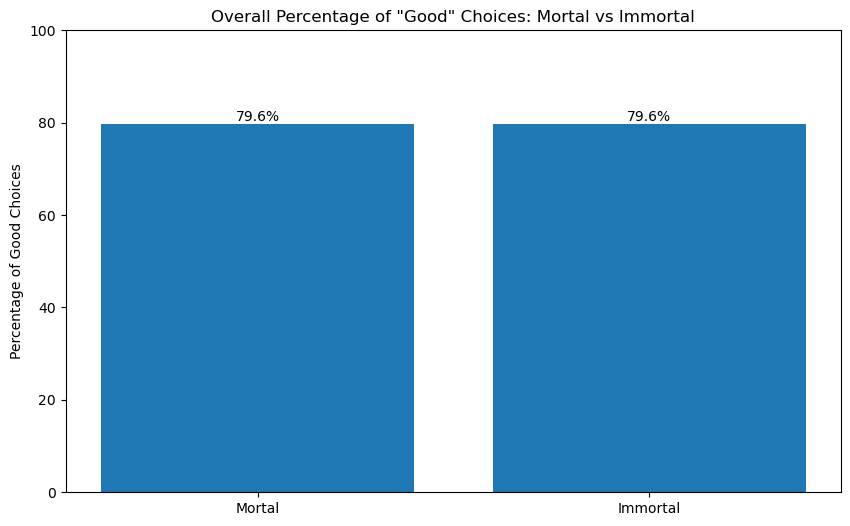

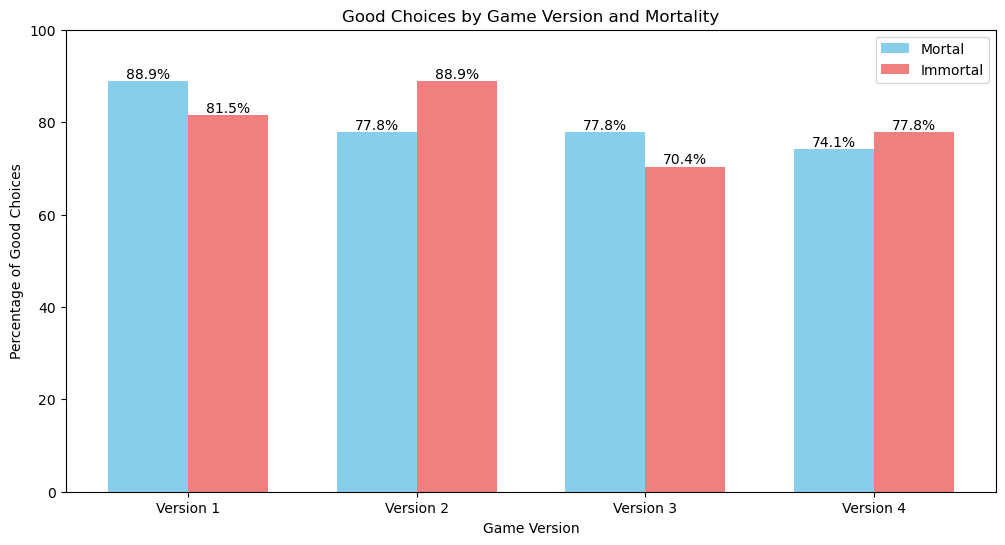


Statistical Summary:
--------------------------------------------------

Overall Statistics:
Mortal good choices: 79.6%
Immortal good choices: 79.6%
Difference: 0.0%

Version-specific Statistics:

Version 1:
Mortal good choices: 88.9%
Immortal good choices: 81.5%
Difference: -7.4%

Version 2:
Mortal good choices: 77.8%
Immortal good choices: 88.9%
Difference: 11.1%

Version 3:
Mortal good choices: 77.8%
Immortal good choices: 70.4%
Difference: -7.4%

Version 4:
Mortal good choices: 74.1%
Immortal good choices: 77.8%
Difference: 3.7%


In [73]:
# How immortality influences players choices
def process_choices(df):
    good_choices = {
        'Coinroom': 'Yes',
        'FireRoom': 'Help them',
        'FireballRoom': 'Good luck',
        'CageRoom': 'Free the human',
        'FoodRoom': 'Give food',
        'ShoesRoom': 'Complement shoes'
    }
    
    df['made_good_choice'] = df.apply(lambda row: 
        1 if row['choice'] == good_choices.get(row['room']) else 0, axis=1)
    
    df['is_immortal'] = df['level'].apply(lambda x: '.2' in str(x))
    df['game_version'] = df['level'].apply(lambda x: int(str(x).split('.')[0]))
    
    return df

df = pd.read_csv('merged_resorted_data.csv')
df = process_choices(df)

def plot_overall_comparison(df):
    plt.figure(figsize=(10, 6))
    mortal = df[~df['is_immortal']]['made_good_choice'].mean() * 100
    immortal = df[df['is_immortal']]['made_good_choice'].mean() * 100
    
    bars = plt.bar(['Mortal', 'Immortal'], [mortal, immortal])
    plt.title('Overall Percentage of "Good" Choices: Mortal vs Immortal')
    plt.ylabel('Percentage of Good Choices')
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom')
    
    plt.ylim(0, 100)
    plt.show()

def plot_version_comparison(df):
    plt.figure(figsize=(12, 6))
    versions = sorted(df['game_version'].unique())
    
    mortal_means = []
    immortal_means = []
    
    for version in versions:
        version_data = df[df['game_version'] == version]
        mortal_means.append(version_data[~version_data['is_immortal']]['made_good_choice'].mean() * 100)
        immortal_means.append(version_data[version_data['is_immortal']]['made_good_choice'].mean() * 100)
    
    x = range(len(versions))
    width = 0.35
    
    plt.bar([i - width/2 for i in x], mortal_means, width, label='Mortal', color='skyblue')
    plt.bar([i + width/2 for i in x], immortal_means, width, label='Immortal', color='lightcoral')
    
    plt.xlabel('Game Version')
    plt.ylabel('Percentage of Good Choices')
    plt.title('Good Choices by Game Version and Mortality')
    plt.xticks(x, [f'Version {v}' for v in versions])
    plt.legend()
    
    # Add percentage labels
    for i in x:
        plt.text(i - width/2, mortal_means[i], f'{mortal_means[i]:.1f}%', 
                ha='center', va='bottom')
        plt.text(i + width/2, immortal_means[i], f'{immortal_means[i]:.1f}%',
                ha='center', va='bottom')
    
    plt.ylim(0, 100)
    plt.show()

def print_statistics(df):
    print("\nStatistical Summary:")
    print("-" * 50)
    
    print("\nOverall Statistics:")
    mortal_overall = df[~df['is_immortal']]['made_good_choice'].mean() * 100
    immortal_overall = df[df['is_immortal']]['made_good_choice'].mean() * 100
    print(f"Mortal good choices: {mortal_overall:.1f}%")
    print(f"Immortal good choices: {immortal_overall:.1f}%")
    print(f"Difference: {immortal_overall - mortal_overall:.1f}%")

    print("\nVersion-specific Statistics:")
    for version in sorted(df['game_version'].unique()):
        version_data = df[df['game_version'] == version]
        mortal = version_data[~version_data['is_immortal']]['made_good_choice'].mean() * 100
        immortal = version_data[version_data['is_immortal']]['made_good_choice'].mean() * 100
        print(f"\nVersion {version}:")
        print(f"Mortal good choices: {mortal:.1f}%")
        print(f"Immortal good choices: {immortal:.1f}%")
        print(f"Difference: {immortal - mortal:.1f}%")

plot_overall_comparison(df)
plot_version_comparison(df)
print_statistics(df)

In [24]:
# no correlation between feeling score and decision time
# from scipy import stats

# df = pd.read_csv('merged_resorted_data.csv')

# df['is_mortal'] = df['level'].astype(str).str.endswith('.1')

# plt.figure(figsize=(10, 6))

# mortal_data = df[df['is_mortal']][['feeling', 'time']].dropna()
# immortal_data = df[~df['is_mortal']][['feeling', 'time']].dropna()

# sns.scatterplot(data=mortal_data, 
#                 x='feeling', 
#                 y='time', 
#                 alpha=0.5,
#                 label='Mortal',
#                 color='blue')

# sns.scatterplot(data=immortal_data, 
#                 x='feeling', 
#                 y='time', 
#                 alpha=0.5,
#                 label='Immortal',
#                 color='red')

# sns.regplot(data=mortal_data, 
#             x='feeling', 
#             y='time', 
#             scatter=False,
#             color='blue')

# sns.regplot(data=immortal_data, 
#             x='feeling', 
#             y='time', 
#             scatter=False,
#             color='red')

# plt.title('Correlation: Choice Difficulty vs Decision Time')
# plt.xlabel('Feeling Score')
# plt.ylabel('Decision Time (seconds)')

# mortal_corr = stats.pearsonr(mortal_data['feeling'], mortal_data['time'])[0]
# immortal_corr = stats.pearsonr(immortal_data['feeling'], immortal_data['time'])[0]

# plt.text(0.02, 0.98, f'Mortal Correlation: {mortal_corr:.2f}', 
#          transform=plt.gca().transAxes)
# plt.text(0.02, 0.94, f'Immortal Correlation: {immortal_corr:.2f}', 
#          transform=plt.gca().transAxes)

# plt.tight_layout()
# plt.show()

# print("\nMortal Condition Statistics:")
# print(f"Number of valid observations: {len(mortal_data)}")
# print(f"Average feeling score: {mortal_data['feeling'].mean():.2f}")
# print(f"Average decision time: {mortal_data['time'].mean():.2f} seconds")

# print("\nImmortal Condition Statistics:")
# print(f"Number of valid observations: {len(immortal_data)}")
# print(f"Average feeling score: {immortal_data['feeling'].mean():.2f}")
# print(f"Average decision time: {immortal_data['time'].mean():.2f} seconds")

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from huggingface_hub import PyTorchModelHubMixin
from transformers import AutoModel, AutoTokenizer
import torch.nn.functional as F
from tqdm import tqdm

print("Loading BERT model and tokenizer...")
bert_model = AutoModel.from_pretrained("bert-base-uncased")
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

class MyModel(
    nn.Module,
    PyTorchModelHubMixin,
    pipeline_tag="text-classification",
    license="mit",
):
    def __init__(self, bert_model, moral_label=2):
        super(MyModel, self).__init__()
        self.bert = bert_model
        bert_dim = 768
        self.invariant_trans = nn.Linear(768, 768)
        self.moral_classification = nn.Sequential(nn.Linear(768,768),
                                                nn.ReLU(),
                                                nn.Linear(768, moral_label))

    def forward(self, input_ids, token_type_ids, attention_mask):
        pooled_output = self.bert(input_ids,
                                token_type_ids = token_type_ids,
                                attention_mask = attention_mask).last_hidden_state[:,0,:]

        pooled_output = self.invariant_trans(pooled_output)
        logits = self.moral_classification(pooled_output)
        return logits

def preprocessing(text):
    """
    Safely preprocess a single text input.
    """

    if not isinstance(text, str):
        text = str(text)
    
    if not text.strip():
        text = "empty text"
    
    try:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=150,
            padding='max_length',
            return_attention_mask=True,
            return_token_type_ids=True,
            return_tensors='pt',
            truncation=True
        )
        return encoded
    except Exception as e:
        print(f"Error preprocessing text: {str(e)}")
        return tokenizer.encode_plus(
            "error",
            add_special_tokens=True,
            max_length=150,
            padding='max_length',
            return_attention_mask=True,
            return_token_type_ids=True,
            return_tensors='pt',
            truncation=True
        )

print("Loading CSV file...")
df = pd.read_csv("merged_resorted_data.csv") 

mft_values = ["care", "harm", "fairness", "cheating", "loyalty", "betrayal",
              "authority", "subversion", "purity", "degradation"]

positive_morals = ["care", "fairness", "loyalty", "authority", "purity"]
negative_morals = ["harm", "cheating", "betrayal", "subversion", "degradation"]

model_cache = {}
preprocessing_cache = {}

def get_model_score(text, mft):
    """Get model prediction with preprocessing progress tracking"""
    if text not in preprocessing_cache:
        preprocessing_cache[text] = preprocessing(text)
    
    encoded = preprocessing_cache[text]
    
    if mft not in model_cache:
        repo_name = f"vjosap/moralBERT-predict-{mft}-in-text"
        model_cache[mft] = MyModel.from_pretrained(repo_name, bert_model=bert_model)
    
    model = model_cache[mft]
    
    output = model(**encoded)
    score = F.softmax(output, dim=1)
    return score[0, 1].item()

def process_single_text(text):
    """Process a single text with all moral foundations"""
    reason_scores = {"reason": text}

    for mft in tqdm(mft_values, desc="Processing moral foundations", leave=False):
        reason_scores[mft] = get_model_score(text, mft)

    reason_scores['positive_morals_sum'] = sum(reason_scores[moral] for moral in positive_morals)
    reason_scores['negative_morals_sum'] = sum(reason_scores[moral] for moral in negative_morals)
    
    return reason_scores

texts = df['reason'].tolist() 

print("\nProcessing texts...")
results = []
for text in tqdm(texts, desc="Analyzing texts", ncols=100):
    results.append(process_single_text(text))

print("\nCreating results DataFrame...")
results_df = pd.DataFrame(results)

print("\nSample of predictions:")
print(results_df.head())

print("\nSaving results to CSV...")
results_df.to_csv("moral_foundation_scores_with_sums.csv", index=False)
print("Results saved to 'moral_foundation_scores_with_sums.csv'")

print("\nSummary Statistics:")
print("\nPositive Morals Sum Statistics:")
print(results_df['positive_morals_sum'].describe())
print("\nNegative Morals Sum Statistics:")
print(results_df['negative_morals_sum'].describe())

Loading BERT model and tokenizer...
Loading CSV file...

Processing texts...


Processing moral foundations:  20%|█████████████████████████▊                                                                                                       | 2/10 [00:00<00:00, 14.39it/s]

Total rows: 216, Number of players: 36

Statistical Analysis Results:

Care:
Positive: Mortal=0.418, Immortal=0.421, p=0.670
Negative: Mortal=0.386, Immortal=0.384, p=0.804

Fairness:
Positive: Mortal=0.396, Immortal=0.430, p=0.010
Negative: Mortal=0.393, Immortal=0.402, p=0.442

Loyalty:
Positive: Mortal=0.550, Immortal=0.563, p=0.185
Negative: Mortal=0.538, Immortal=0.555, p=0.160

Authority:
Positive: Mortal=0.309, Immortal=0.317, p=0.325
Negative: Mortal=0.158, Immortal=0.160, p=0.639

Purity:
Positive: Mortal=0.407, Immortal=0.418, p=0.264
Negative: Mortal=0.076, Immortal=0.070, p=0.481


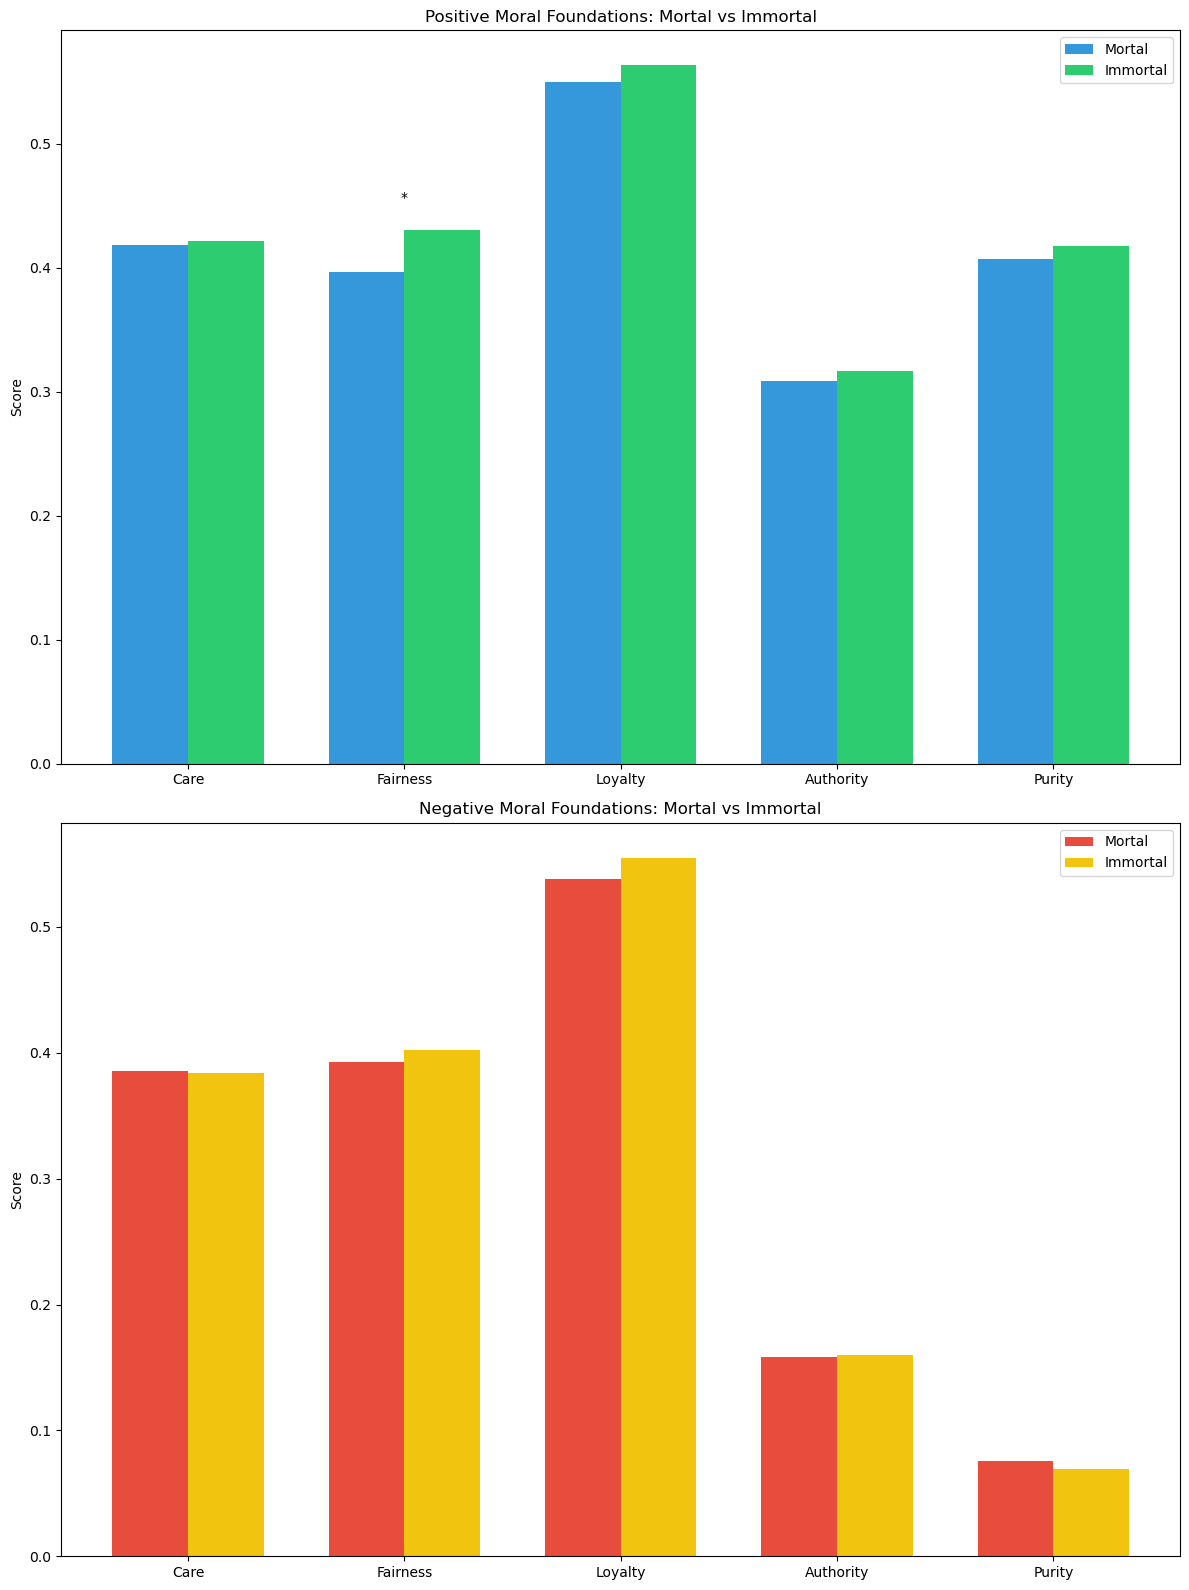

In [68]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
# How immortality influences players thoughts
def process_moral_data(df):
    n_rows = len(df)
    n_players = n_rows // 6
    print(f"Total rows: {n_rows}, Number of players: {n_players}")

    player_ids = []
    conditions = []
    
    for player in range(n_players):
        player_ids.extend([player] * 3)
        conditions.extend(['mortal'] * 3)
        player_ids.extend([player] * 3)
        conditions.extend(['immortal'] * 3)
    
    df['player_id'] = player_ids
    df['condition'] = conditions
    
    return df

def calculate_foundation_scores(df):
    grouped = df.groupby(['player_id', 'condition'])

    foundation_means = grouped.agg({
        'care': 'mean',
        'harm': 'mean',
        'fairness': 'mean',
        'cheating': 'mean',
        'loyalty': 'mean',
        'betrayal': 'mean',
        'authority': 'mean',
        'subversion': 'mean',
        'purity': 'mean',
        'degradation': 'mean',
        'positive_morals_sum': 'mean',
        'negative_morals_sum': 'mean'
    }).reset_index()
    
    return foundation_means

def perform_statistical_tests(data):
    foundations = {
        'Care': ('care', 'harm'),
        'Fairness': ('fairness', 'cheating'),
        'Loyalty': ('loyalty', 'betrayal'),
        'Authority': ('authority', 'subversion'),
        'Purity': ('purity', 'degradation')
    }
    
    results = []
    
    for foundation, (pos, neg) in foundations.items():
        mortal_pos = data[data['condition'] == 'mortal'][pos]
        immortal_pos = data[data['condition'] == 'immortal'][pos]
        mortal_neg = data[data['condition'] == 'mortal'][neg]
        immortal_neg = data[data['condition'] == 'immortal'][neg]
        
        t_stat_pos, p_val_pos = stats.ttest_rel(mortal_pos, immortal_pos)
        t_stat_neg, p_val_neg = stats.ttest_rel(mortal_neg, immortal_neg)
        
        results.append({
            'foundation': foundation,
            'mortal_pos_mean': mortal_pos.mean(),
            'immortal_pos_mean': immortal_pos.mean(),
            'pos_p_value': p_val_pos,
            'mortal_neg_mean': mortal_neg.mean(),
            'immortal_neg_mean': immortal_neg.mean(),
            'neg_p_value': p_val_neg
        })
    
    return pd.DataFrame(results)

def plot_results(results):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))
    
    x = np.arange(len(results))
    width = 0.35
    
    ax1.bar(x - width/2, results['mortal_pos_mean'], width, label='Mortal', color='#3498db')
    ax1.bar(x + width/2, results['immortal_pos_mean'], width, label='Immortal', color='#2ecc71')
    
    ax1.set_ylabel('Score')
    ax1.set_title('Positive Moral Foundations: Mortal vs Immortal')
    ax1.set_xticks(x)
    ax1.set_xticklabels(results['foundation'])
    ax1.legend()
    
    for i, p in enumerate(results['pos_p_value']):
        if p < 0.05:
            height = max(results['mortal_pos_mean'][i], results['immortal_pos_mean'][i])
            ax1.text(i, height + 0.02, '*', ha='center', va='bottom')
    
    ax2.bar(x - width/2, results['mortal_neg_mean'], width, label='Mortal', color='#e74c3c')
    ax2.bar(x + width/2, results['immortal_neg_mean'], width, label='Immortal', color='#f1c40f')
    
    ax2.set_ylabel('Score')
    ax2.set_title('Negative Moral Foundations: Mortal vs Immortal')
    ax2.set_xticks(x)
    ax2.set_xticklabels(results['foundation'])
    ax2.legend()
    
    for i, p in enumerate(results['neg_p_value']):
        if p < 0.05:
            height = max(results['mortal_neg_mean'][i], results['immortal_neg_mean'][i])
            ax2.text(i, height + 0.02, '*', ha='center', va='bottom')
    
    plt.tight_layout()
    return fig

def main():
    df = pd.read_csv('moral_foundation_scores_with_sums.csv')

    df_processed = process_moral_data(df)
    
    foundation_scores = calculate_foundation_scores(df_processed)
    
    results = perform_statistical_tests(foundation_scores)
    
    plot_results(results)
    
    print("\nStatistical Analysis Results:")
    for _, row in results.iterrows():
        print(f"\n{row['foundation']}:")
        print(f"Positive: Mortal={row['mortal_pos_mean']:.3f}, Immortal={row['immortal_pos_mean']:.3f}, p={row['pos_p_value']:.3f}")
        print(f"Negative: Mortal={row['mortal_neg_mean']:.3f}, Immortal={row['immortal_neg_mean']:.3f}, p={row['neg_p_value']:.3f}")
    
    plt.show()

if __name__ == "__main__":
    main()